<a href="https://colab.research.google.com/github/Zain-mahfoud94/PyTorch-for-Deep-Learning-Bootcamp/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 02. Neural Netwrok classification with PyTorch

## 1. Classification Data

In [ ]:
import sklearn
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples = 1000
# Create circlues
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
# Print the first 5 samples of X,y
print(f"First 5 samples of X:{X[:5]}")
print(f"First 5 samples of y:{y[:5]}")

First 5 samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [ ]:
# Make a dataFram of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                       "lable":y})
circles.head(10)

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


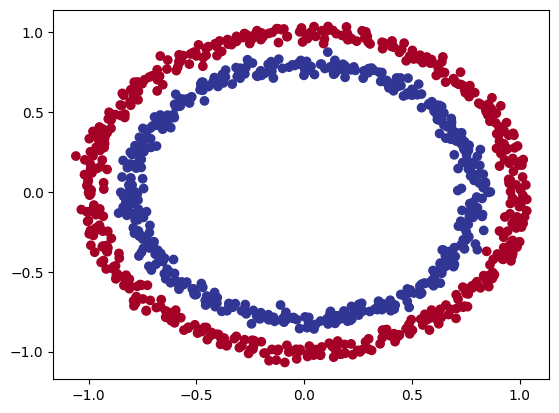

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one Sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one Sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one Sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one Sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors
import torch
print(torch.__version__)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5], type(X), X.dtype, y.dtype

2.5.1+cu121


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.Tensor,
 torch.float32,
 torch.float32)

In [ ]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Bulding a Model

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5, dtype=torch.float) # takes in 2 feature and upscales it to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1, dtype=torch.float) # takes in 5 features from previous layer and outputs a single feature (same as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self,X):
    return self.layer_2(self.layer_1(X)) # x-> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the traget device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5912, -0.5041],
                      [ 0.0232, -0.2630],
                      [ 0.2869,  0.3500],
                      [ 0.3927, -0.6295],
                      [ 0.3442, -0.4825]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3198, -0.1454,  0.5270,  0.5778,  0.0727], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0391,  0.4107, -0.4168,  0.2371, -0.0956]], device='cuda:0')),
             ('layer_2.bias', tensor([0.1642], device='cuda:0'))])

In [ ]:
# Using nn.sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5421,  0.4978],
                      [ 0.2519, -0.3748],
                      [-0.4112, -0.0811],
                      [-0.4114, -0.5864],
                      [ 0.5858, -0.0557]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4820,  0.1025, -0.1245,  0.6637, -0.3971], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4237, -0.4255,  0.2660,  0.4092,  0.0441]], device='cuda:0')),
             ('1.bias', tensor([-0.3043], device='cuda:0'))])

In [ ]:
# Make some prediction with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds[:5], y_test[:5]

(tensor([[-0.0896],
         [-0.2276],
         [ 0.2675],
         [-0.1907],
         [ 0.2598]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

### 2.1 Setup Loss function and optimizer

In [ ]:

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_true)) * 100
  return acc

### Train the model

### 3.1 Going for raw logits -> prediction probabilites -> prediction labels

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test[0:5].to(device))
y_test[:5], y_logits

(tensor([1., 0., 1., 0., 1.]),
 tensor([[-0.0896],
         [-0.2276],
         [ 0.2675],
         [-0.1907],
         [ 0.2598]], device='cuda:0'))

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilites
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.4776],
        [0.4433],
        [0.5665],
        [0.4525],
        [0.5646]], device='cuda:0')

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_preds_probs)
# In full (logits -> pred probs -> pred labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))
# Get rid of extra dimention
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Building a training and testing loops

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train, y_pred= y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test, y_pred= test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | train_loss: {loss:.5f} | Acc: {acc:.2f}% | test_loss: {test_loss} | test_acc: {test_acc:.2f}%")

Epoch: 0 | train_loss: 0.70183 | Acc: 50.50% | test_loss: 0.6917392611503601 | test_acc: 55.00%
Epoch: 10 | train_loss: 0.70143 | Acc: 50.25% | test_loss: 0.6915692687034607 | test_acc: 55.00%
Epoch: 20 | train_loss: 0.70106 | Acc: 50.12% | test_loss: 0.691423237323761 | test_acc: 54.50%
Epoch: 30 | train_loss: 0.70073 | Acc: 50.00% | test_loss: 0.6912978887557983 | test_acc: 54.50%
Epoch: 40 | train_loss: 0.70042 | Acc: 49.62% | test_loss: 0.6911906003952026 | test_acc: 54.50%
Epoch: 50 | train_loss: 0.70013 | Acc: 49.25% | test_loss: 0.6910989284515381 | test_acc: 54.50%
Epoch: 60 | train_loss: 0.69987 | Acc: 49.25% | test_loss: 0.691020667552948 | test_acc: 53.50%
Epoch: 70 | train_loss: 0.69963 | Acc: 49.12% | test_loss: 0.6909540891647339 | test_acc: 54.50%
Epoch: 80 | train_loss: 0.69940 | Acc: 48.88% | test_loss: 0.6908977627754211 | test_acc: 54.50%
Epoch: 90 | train_loss: 0.69919 | Acc: 49.00% | test_loss: 0.6908501982688904 | test_acc: 54.00%


## 4. Make predictions and evaluate the model


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo ( if it's not already downloaeded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

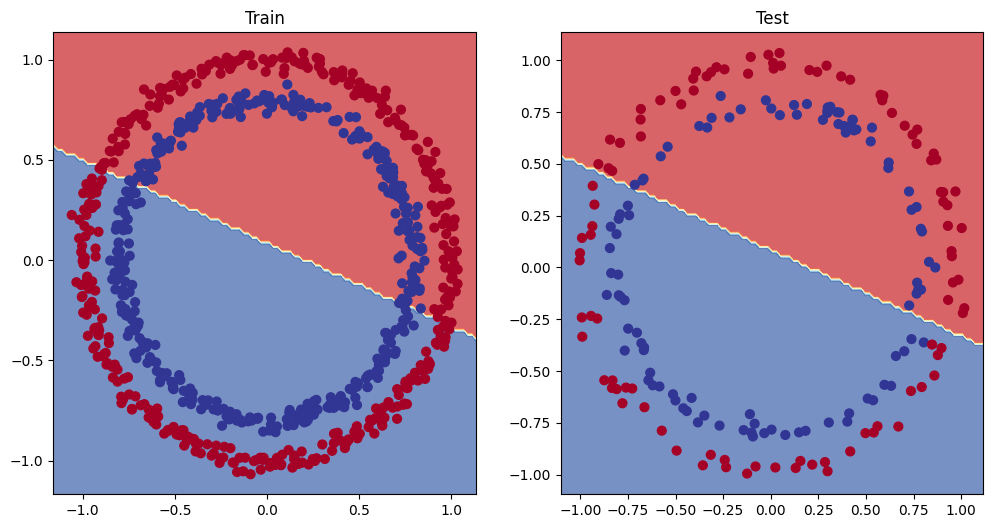

In [ ]:
# Plot decision boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving the model

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    #self.activation_layer_1 = nn.Relu()
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    #self.activation_layer_2 = nn.Relu()
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, X):
    #z = self.layer_1(X)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(X)))
    #return self.layer_3(self.activation_layer_2(self.layer_2(self.activation_layer_1(self.layer_1(X)))))
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()
# Ceate an optimizer
optimzer = torch.optim.SGD(model_1.parameters(),lr=0.01)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Training for longer
epochs = 1000
# Put data on the target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_prob = torch.sigmoid(y_logits)
  y_preds = torch.round(y_prob)
  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_preds)
  # 3. Optimizer Zero grad
  optimizer.zero_grad()
  # 4. Loss backwards (backpropagation)
  loss.backward()
  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)
  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%")

Epoch: 0 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 100 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 200 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 300 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 400 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 500 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 600 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 700 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 800 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%
Epoch: 900 | Loss: 0.69261 | Acc: 50.88% | Test loss:0.69081 | Test acc:51.00%


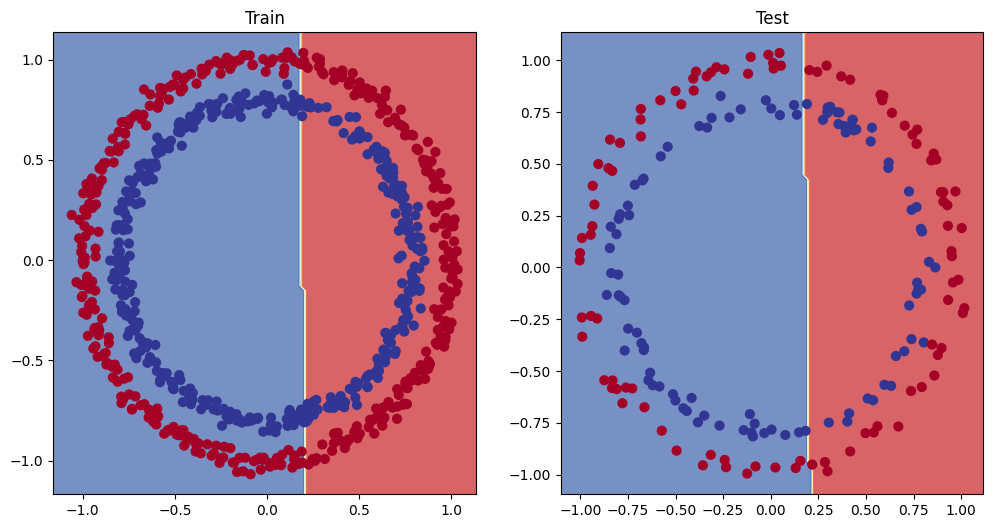

In [ ]:
# Plot decision boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

In [ ]:
# Create some data (same as before 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
print(len(X_regression))
X_regression[:10], y_regression[:10]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
# Create train, test splits
from sklearn.model_selection import train_test_split

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2)
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

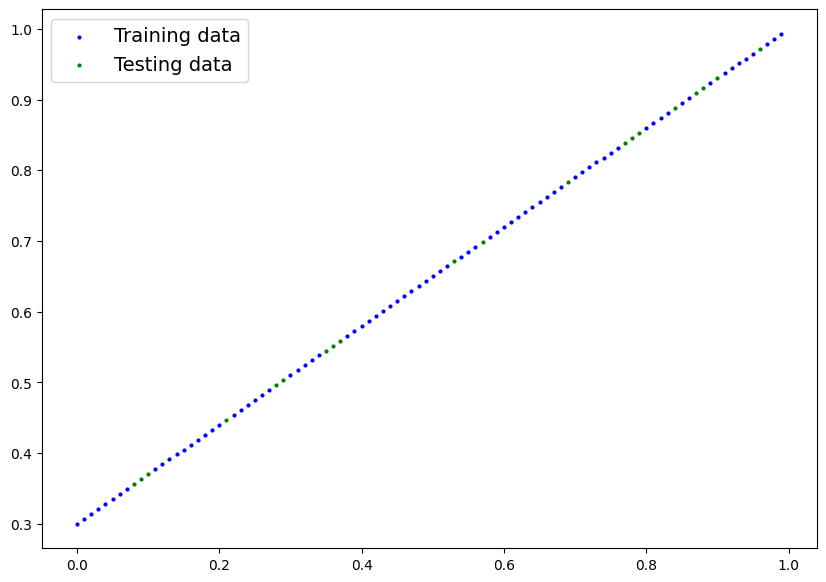

In [ ]:
plot_predictions(train_data=X_train_regression, train_labels= y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

### 5.2 Adjusting "model_1" to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(nn.Linear(in_features=1, out_features=10),
                        nn.Linear(in_features=10, out_features=10),
                        nn.Linear(in_features=10, out_features=1)).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimzer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Training for longer
epochs = 1000
# Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### Training
  model_2.train()
  # 1. Forward pass
  y_preds = model_2(X_train_regression)
  # 2. Calculate the loss
  loss = loss_fn(y_preds, y_train_regression)
  # 3. Optimizer Zero grad
  optimizer.zero_grad()
  # 4. Loss backwards (backpropagation)
  loss.backward()
  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_preds = model_2(X_test_regression)
    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test_regression)
  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss:{test_loss:.5f}")

Epoch: 0 | Loss: 0.79475 | Test loss:0.77373
Epoch: 100 | Loss: 0.01199 | Test loss:0.02973
Epoch: 200 | Loss: 0.01198 | Test loss:0.02773
Epoch: 300 | Loss: 0.01481 | Test loss:0.02529
Epoch: 400 | Loss: 0.01442 | Test loss:0.02474
Epoch: 500 | Loss: 0.01390 | Test loss:0.02323
Epoch: 600 | Loss: 0.01303 | Test loss:0.02216
Epoch: 700 | Loss: 0.01268 | Test loss:0.02175
Epoch: 800 | Loss: 0.01287 | Test loss:0.02193
Epoch: 900 | Loss: 0.01294 | Test loss:0.02223


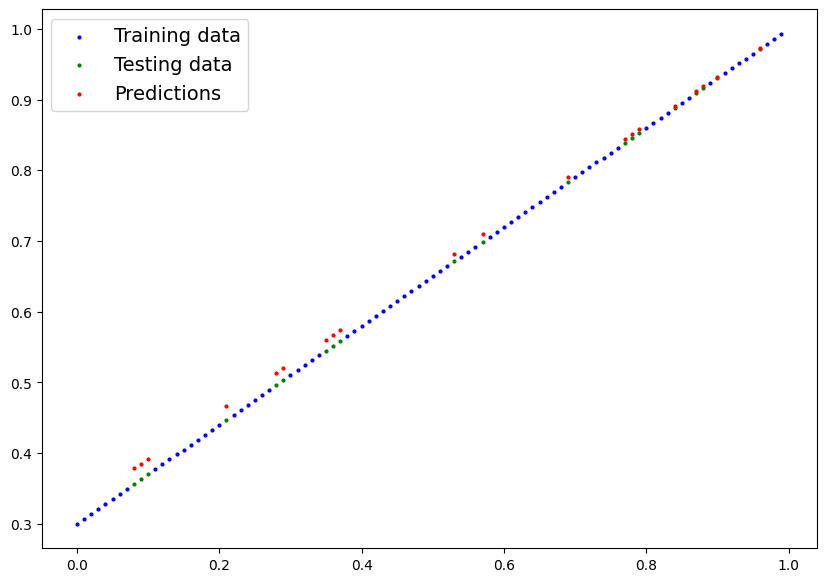

In [ ]:
# Turn on evaluation mode
model_2.eval()
# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)
# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(), train_labels=y_train_regression.cpu(), test_data=X_test_regression.cpu(), test_labels=y_test_regression.cpu(), predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

### 6.1 Recreating non-linear data (red and blue circles)

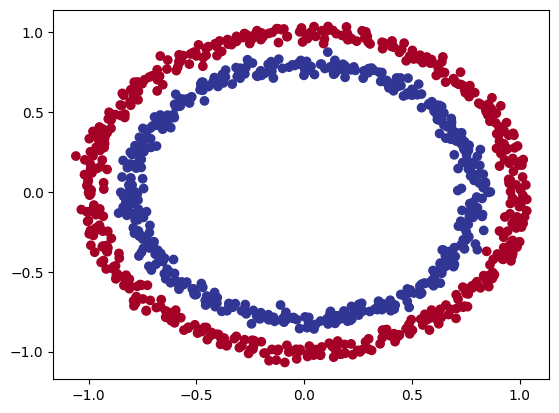

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state=42)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and the to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 6.2 Building a model with non-linearity

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=16)
    self.layer_3 = nn.Linear(in_features=16, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, X):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr= 0.1)

### Train a model with non-linearity

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  # Forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  # Calculat the loss and acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_preds)
  # optimizer zero grad
  optimizer.zero_grad()
  # loss backward
  loss.backward()
  # optimizer step
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    y_test_logits = model_3(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))
    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = accuracy_fn(y_test, y_test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | acc: {acc}% | test_loss: {test_loss} | test_acc: {test_acc}%")

Epoch: 0 | loss: 0.6910892128944397 | acc: 54.25% | test_loss: 0.691190242767334 | test_acc: 58.5%
Epoch: 100 | loss: 0.6885142922401428 | acc: 57.375% | test_loss: 0.6886051893234253 | test_acc: 59.0%
Epoch: 200 | loss: 0.6858202815055847 | acc: 61.0% | test_loss: 0.6855523586273193 | test_acc: 61.0%
Epoch: 300 | loss: 0.6815126538276672 | acc: 64.375% | test_loss: 0.6806054711341858 | test_acc: 61.5%
Epoch: 400 | loss: 0.6728639006614685 | acc: 65.875% | test_loss: 0.6721410751342773 | test_acc: 69.5%
Epoch: 500 | loss: 0.6601804494857788 | acc: 67.75% | test_loss: 0.6598992943763733 | test_acc: 68.5%
Epoch: 600 | loss: 0.6402273178100586 | acc: 71.75% | test_loss: 0.6410648822784424 | test_acc: 74.5%
Epoch: 700 | loss: 0.603256344795227 | acc: 84.0% | test_loss: 0.6091870069503784 | test_acc: 84.5%
Epoch: 800 | loss: 0.5349537134170532 | acc: 93.25% | test_loss: 0.5524908900260925 | test_acc: 93.5%
Epoch: 900 | loss: 0.42497554421424866 | acc: 95.5% | test_loss: 0.45659834146499634 

#### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

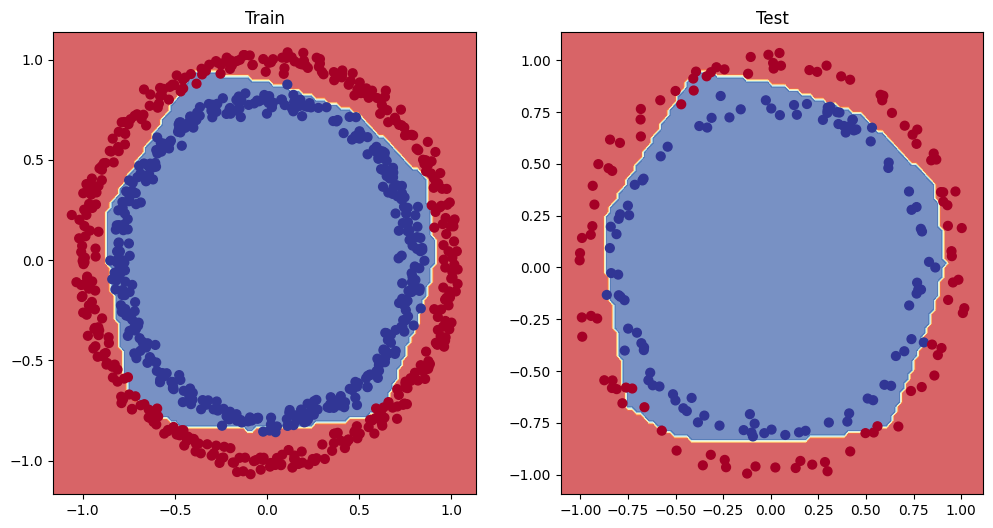

In [ ]:
# Plot decision boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Replicating non-linear activation functions

In [ ]:
# Create a tesnor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

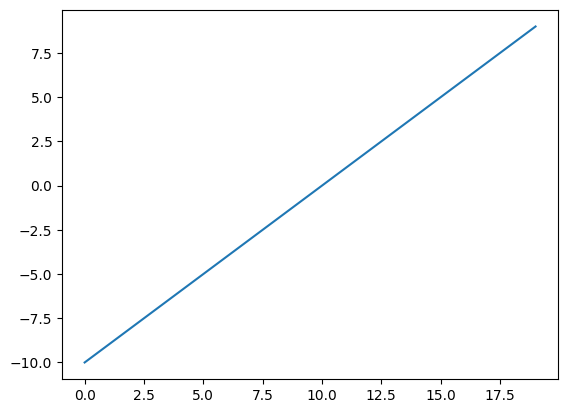

In [ ]:
# Visualize the tensor
plt.plot(A)

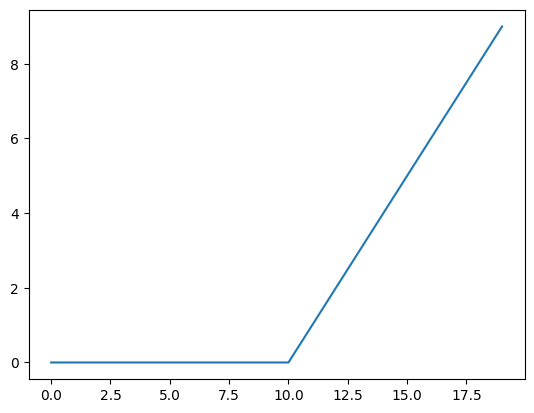

In [ ]:
plt.plot(torch.relu(A))

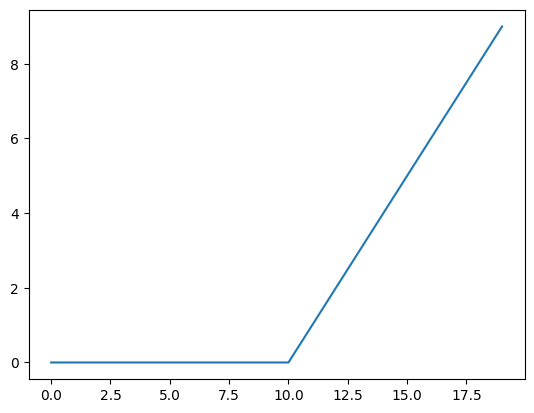

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

plt.plot(relu(A))

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])
tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])


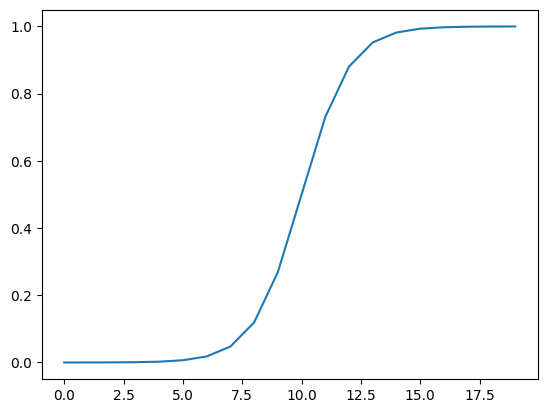

In [ ]:
def sigmoid(x:torch.Tensor) -> torch.Tensor:
  return torch.div(1,(1+torch.exp(-1*x)))
print(torch.sigmoid(A))
print(sigmoid(A))
plt.plot(torch.sigmoid(A))

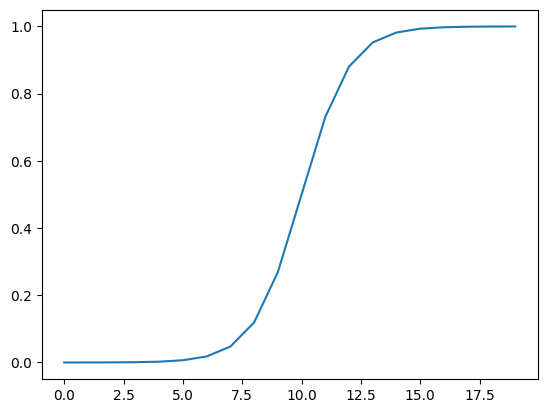

In [ ]:
plt.plot(sigmoid(A))

### 8. Putting it all together with a multiclass classification Problem

### 8.1 Creating a toy multi-class dataset

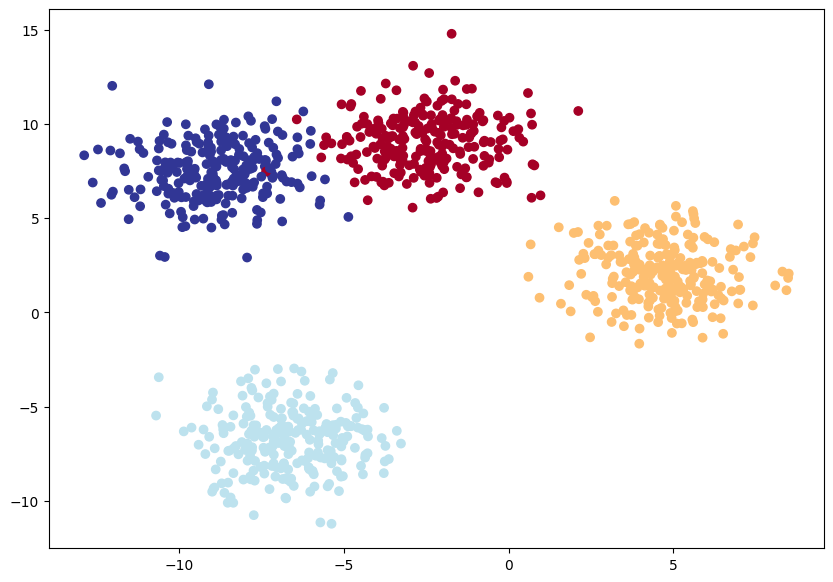

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features= NUM_FEATURES, centers= NUM_CLASSES, cluster_std= 1.5, random_state=RANDOM_SEED)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blog = torch.from_numpy(y_blob).type(torch.LongTensor)
# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)
# 4. Plot data (visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Bulding a multiclass classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobsModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model.
    Args:
    input_features(int): Number of input features to the model
    output_features(int): Number of outputs features (number of output classes)
    hidden_units(int): Number of units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)
# Create an instance of BlobModel and send it to the target device
model_4 = BlobsModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobsModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a mult-class classification model

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.01)

### 8.4 Getting prediction probabilites for a multi-class PyTorch model

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_train.to(device))
y_logits[:5]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], device='cuda:0')

In [ ]:
# Convert our model's logit to outputs to prediction probabilities
y_preds_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_preds_probs[:5])

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], device='cuda:0')
tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3000, 0.1845, 0.2743, 0.2413],
        [0.3424, 0.1450, 0.1936, 0.3190]], device='cuda:0')


In [ ]:
torch.sum(y_preds_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.max(y_preds_probs[0])

tensor(0.3328, device='cuda:0')

In [ ]:
torch.argmax(y_preds_probs[0])

tensor(1, device='cuda:0')

### Convert out model's prediction probabilites to prediction labels

In [ ]:
y_preds = torch.argmax(y_preds_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 8.5 Creating a training and testing loop for a multi-class Pytorch Model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100
# Put data to the target device
y_blob_train = torch.from_numpy(y_blob_train)
y_blob_test = torch.from_numpy(y_blob_test)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

    # Print out what's happening
    if epoch % 10 == 0 :
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1588 | Acc: 40.38% | Test loss: 1.1472 | Test Acc: 38.50%
Epoch: 10 | Loss: 1.0649 | Acc: 55.38% | Test loss: 1.0684 | Test Acc: 50.50%
Epoch: 20 | Loss: 0.9819 | Acc: 62.62% | Test loss: 0.9976 | Test Acc: 57.50%
Epoch: 30 | Loss: 0.9114 | Acc: 70.50% | Test loss: 0.9360 | Test Acc: 67.00%
Epoch: 40 | Loss: 0.8529 | Acc: 88.38% | Test loss: 0.8834 | Test Acc: 87.50%
Epoch: 50 | Loss: 0.8043 | Acc: 92.12% | Test loss: 0.8385 | Test Acc: 93.00%
Epoch: 60 | Loss: 0.7635 | Acc: 93.62% | Test loss: 0.7998 | Test Acc: 94.50%
Epoch: 70 | Loss: 0.7285 | Acc: 94.88% | Test loss: 0.7659 | Test Acc: 95.00%
Epoch: 80 | Loss: 0.6977 | Acc: 95.62% | Test loss: 0.7356 | Test Acc: 95.00%
Epoch: 90 | Loss: 0.6698 | Acc: 96.38% | Test loss: 0.7076 | Test Acc: 96.50%
Epoch: 100 | Loss: 0.6438 | Acc: 96.88% | Test loss: 0.6812 | Test Acc: 97.00%
Epoch: 110 | Loss: 0.6191 | Acc: 97.62% | Test loss: 0.6557 | Test Acc: 97.50%
Epoch: 120 | Loss: 0.5952 | Acc: 97.75% | Test loss: 0.6308 | T

### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.7303,  4.4308, -6.2364, -6.7429],
        [-1.5937, -5.2909, -2.9834,  1.8779],
        [-2.1598, -2.7138,  1.9808, -1.7743],
        [-0.9938,  3.1133, -3.1152, -3.9681],
        [ 2.4305, -1.7024, -7.3999, -5.0829],
        [-2.1594, -6.2420, -3.4056,  2.4497],
        [-1.9299, -2.2932,  1.7722, -1.4036],
        [ 2.2008, -3.7246, -5.5327, -2.5375],
        [-2.8230, -3.5237,  2.3343, -2.3432],
        [ 2.3555, -2.9651, -6.0391, -3.3589]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabbilites
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[5.7025e-03, 9.9426e-01, 2.3162e-05, 1.3958e-05],
        [2.9884e-02, 7.4092e-04, 7.4455e-03, 9.6193e-01],
        [1.5177e-02, 8.7215e-03, 9.5379e-01, 2.2315e-02],
        [1.6144e-02, 9.8110e-01, 1.9350e-03, 8.2464e-04],
        [9.8364e-01, 1.5774e-02, 5.2911e-05, 5.3676e-04],
        [9.8335e-03, 1.6583e-04, 2.8279e-03, 9.8717e-01],
        [2.2768e-02, 1.5833e-02, 9.2286e-01, 3.8538e-02],
        [9.8828e-01, 2.6396e-03, 4.3277e-04, 8.6509e-03],
        [5.6556e-03, 2.8065e-03, 9.8240e-01, 9.1380e-03],
        [9.9166e-01, 4.8493e-03, 2.2420e-04, 3.2708e-03]], device='cuda:0')

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim =1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

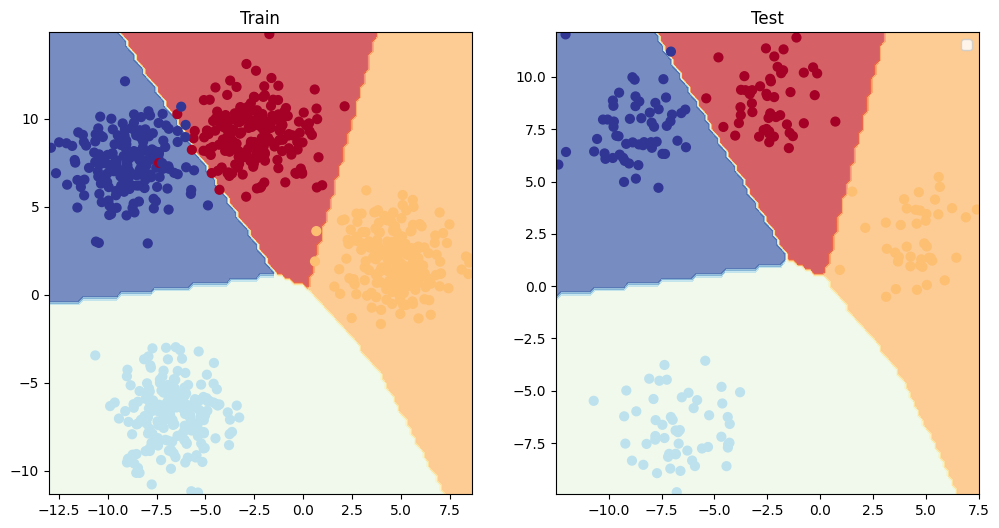

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.legend()

### 9. Other evaluation metrics

In [ ]:
! pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy
# Setup metric
accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
# Calculate accuracy
accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')